# Customer churn of a telecom company

## Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Load the datasets

In [ ]:
df = pd.read_csv('training_data.csv') #loading the training data

## Exploratory Data Analysis

In [ ]:
df.shape

(440833, 12)

In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832,440832.000000,440832.000000,440832.000000,440832.000000,440832,440832,440832.000000,440832.000000,440832.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,Standard,Annual,NaN,NaN,NaN
freq,NaN,NaN,250252,NaN,NaN,NaN,NaN,149128,177198,NaN,NaN,NaN
mean,225398.667955,39.373153,NaN,31.256336,15.807494,3.604437,12.965722,NaN,NaN,631.616223,14.480868,0.567107
std,129531.918550,12.442369,NaN,17.255727,8.586242,3.070218,8.258063,NaN,NaN,240.803001,8.596208,0.495477
min,2.000000,18.000000,NaN,1.000000,1.000000,0.000000,0.000000,NaN,NaN,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,NaN,16.000000,9.000000,1.000000,6.000000,NaN,NaN,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,NaN,32.000000,16.000000,3.000000,12.000000,NaN,NaN,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,NaN,46.000000,23.000000,6.000000,19.000000,NaN,NaN,830.000000,22.000000,1.000000


### Understanding data through visualisation

In [ ]:
numerical_cols = ["Age", "Tenure", "Usage Frequency", "Support Calls", 
                  "Payment Delay", "Total Spend", "Last Interaction"]
categorical_cols = ["Gender", "Subscription Type", "Contract Length"]

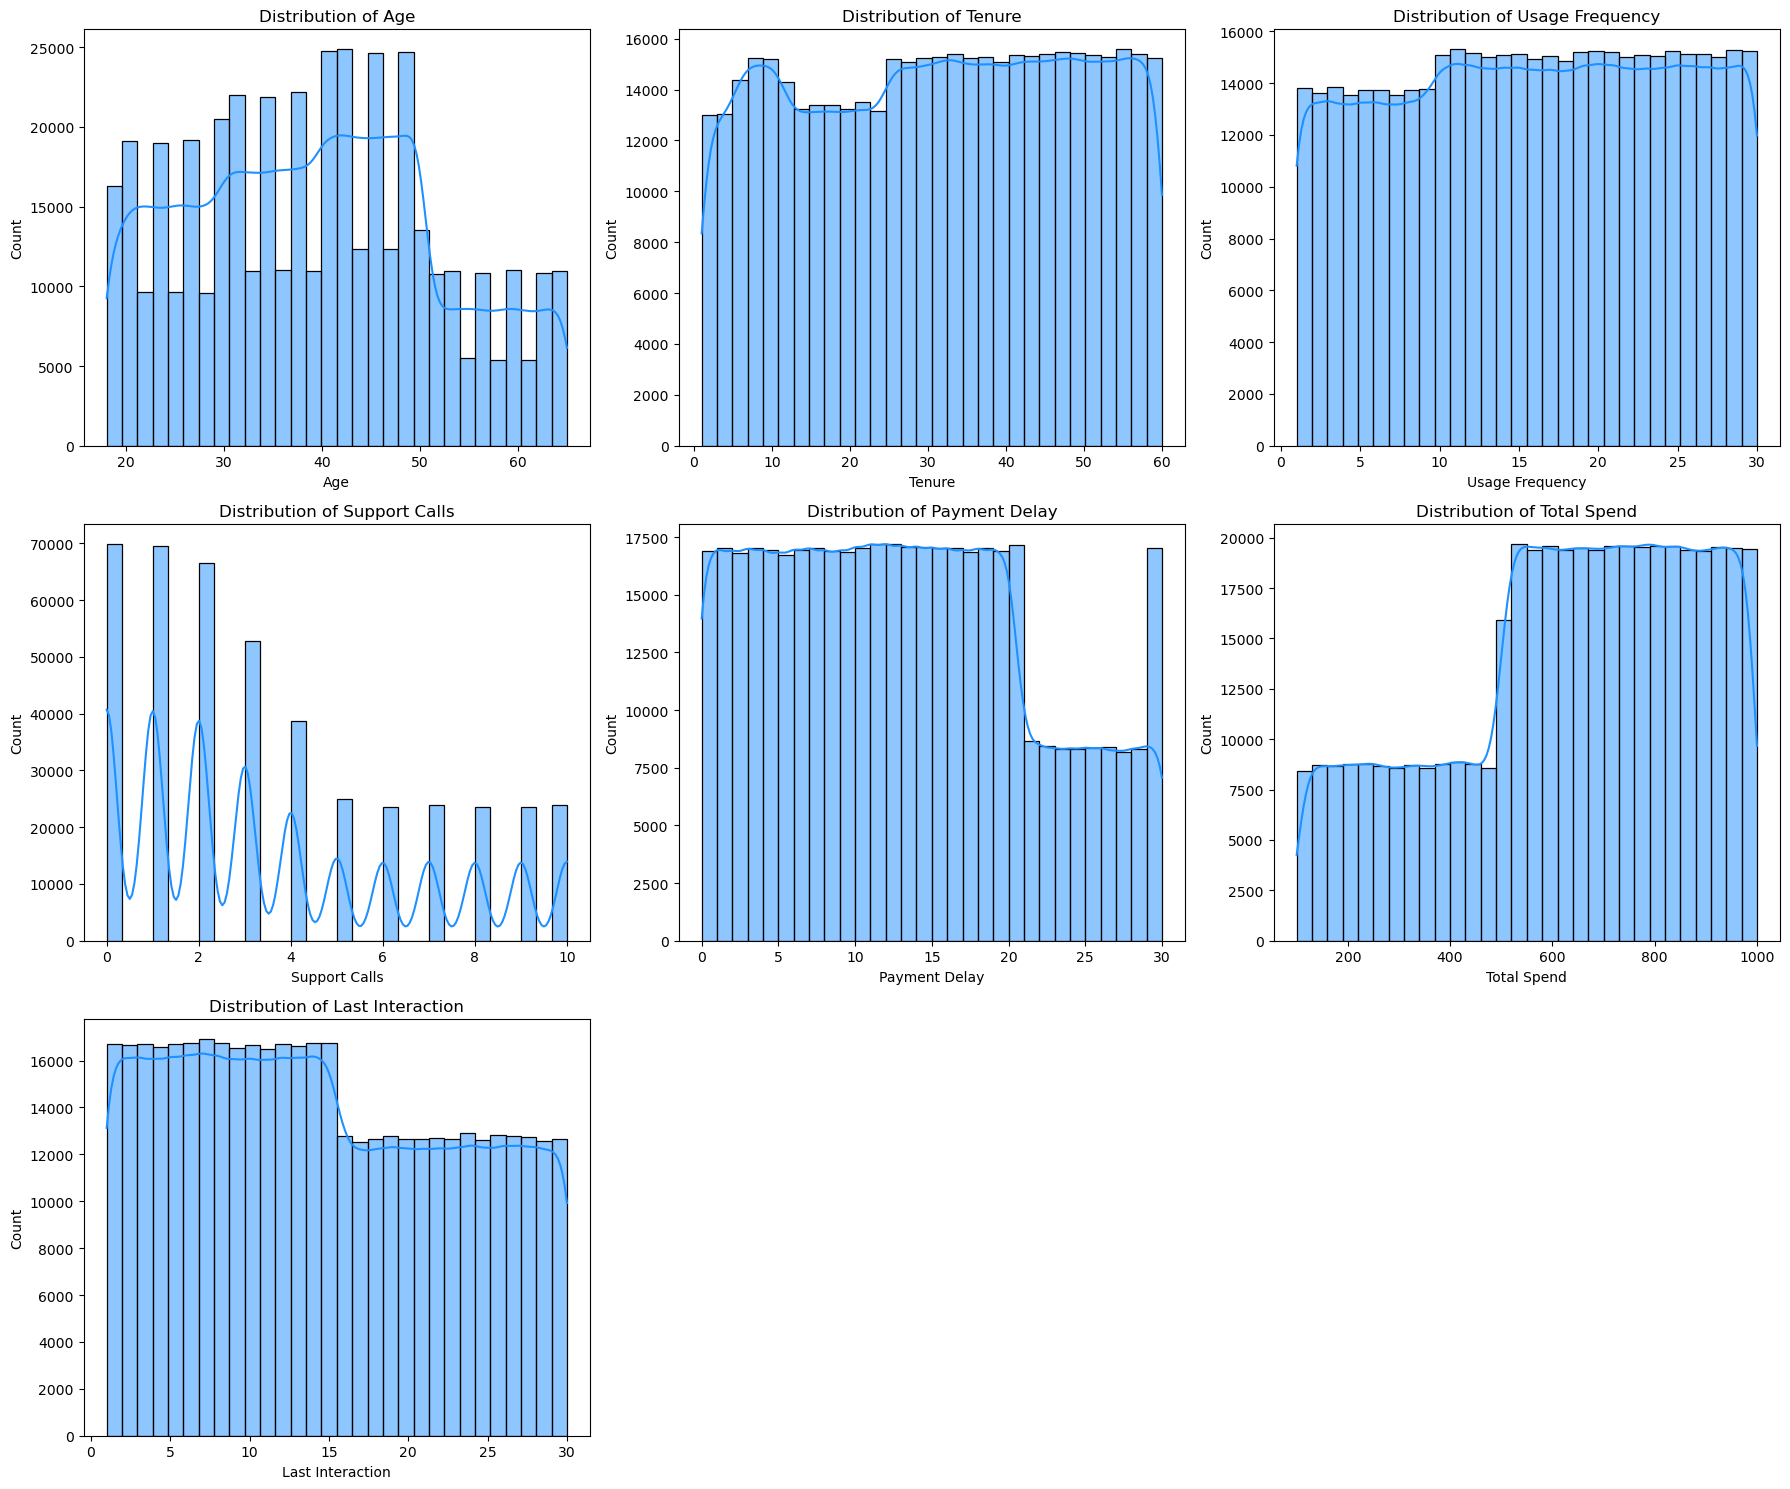

In [ ]:
# Plotting numerical columns
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='dodgerblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

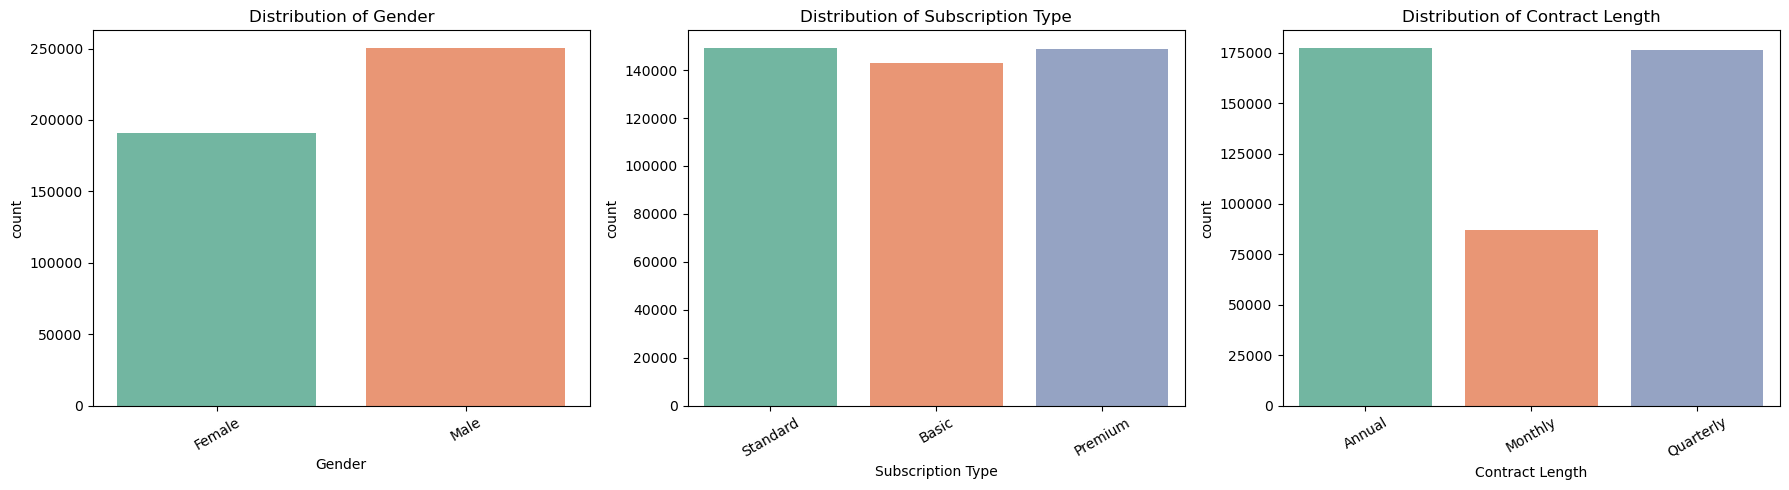

In [ ]:
# plotting categroical columns
plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

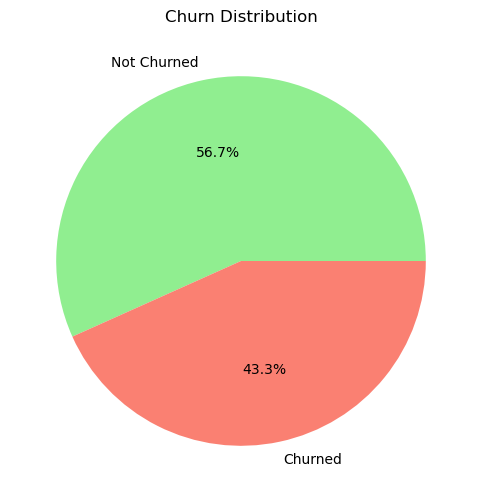

In [ ]:
# Distribution of churn rate
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Churn Distribution')
plt.show()

#### We can see around 43.3% of customers have churned which is a cause of concern 

### 1. Gender

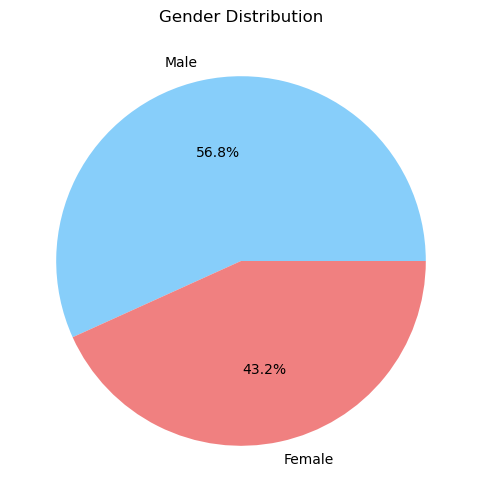

In [ ]:
# Gender distribution among customers
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightskyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

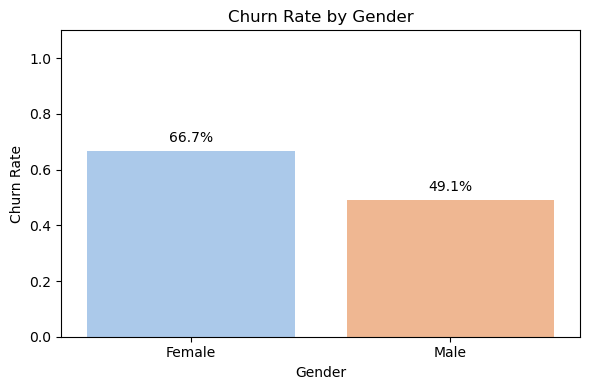

In [ ]:
gender_churn_rate = df.groupby("Gender")["Churn"].mean().reset_index()
gender_churn_rate.rename(columns={"Churn": "Churn Rate"}, inplace=True)

#plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=gender_churn_rate, x="Gender", y="Churn Rate", palette='pastel')

# Add percentage labels on top of bars
for i, row in gender_churn_rate.iterrows():
    plt.text(i, row["Churn Rate"] + 0.02, f"{row['Churn Rate']*100:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate")
plt.xlabel("Gender")
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()


#### Here we can see that though number number of female customers are less than male customers, the churning rate is higher in female customers.
#### Action : Need to implement policies or offers to reten female customers.

### 2. Age Group

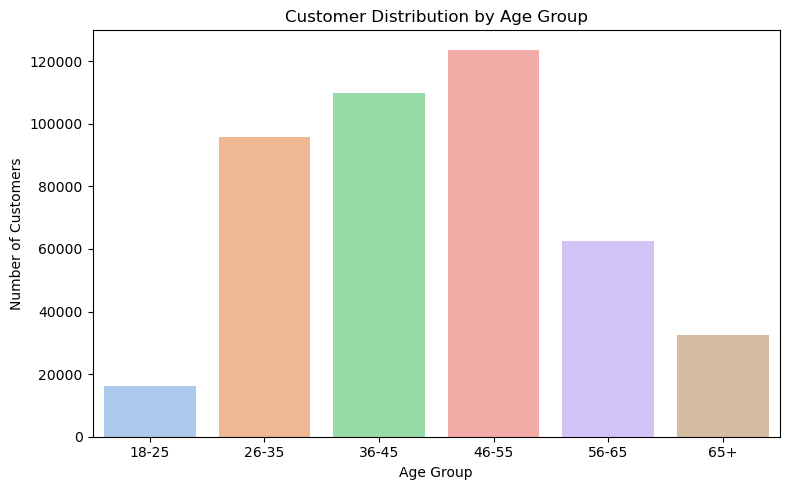

In [ ]:
# Step 1: Create age group column
bins = [0, 19, 29, 39, 49, 59, 120]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Step 2: Plot distribution of customers by age group
age_group_counts = df['Age Group'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="pastel")
plt.title("Customer Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

### Our most customers are from age group of 40-49 and then 30-39, meanwhile cuctomers above 60 are less.

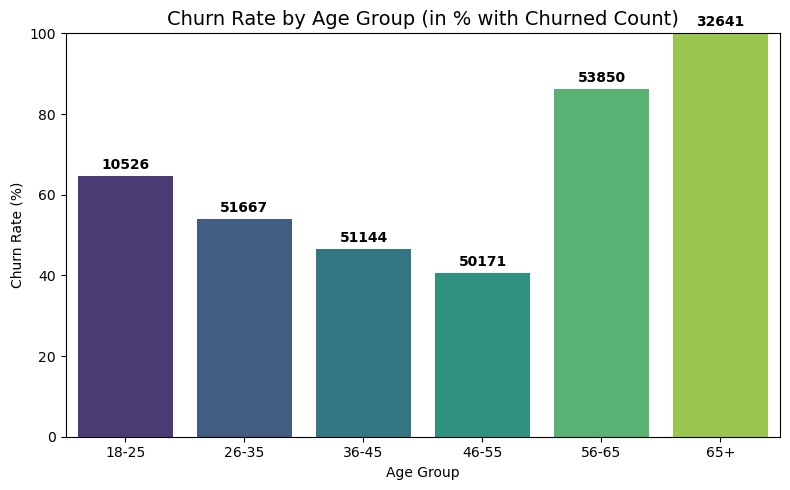

In [ ]:
churn_by_age_group = df.groupby("Age Group").agg(
    Churn_Rate=('Churn', 'mean'),
    Churn_Count=('Churn', 'sum')
).reset_index()

# Convert churn rate to percentage
churn_by_age_group["Churn_Rate"] = churn_by_age_group["Churn_Rate"] * 100

# Plotting
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=churn_by_age_group, x="Age Group", y="Churn_Rate", palette="viridis")

# Annotating churn counts
for index, row in churn_by_age_group.iterrows():
    plt.text(index, row.Churn_Rate + 1, f"{int(row.Churn_Count)}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Churn Rate by Age Group (in % with Churned Count)", fontsize=14)
plt.ylabel("Churn Rate (%)")
plt.xlabel("Age Group")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


#### Here though contribution of senior citizens (age group of above 60), are less compared to others there cjurnate is high
#### Action : we should increase our engagement among older customers, and try to attract more senior citizens.

### 3. Tenure

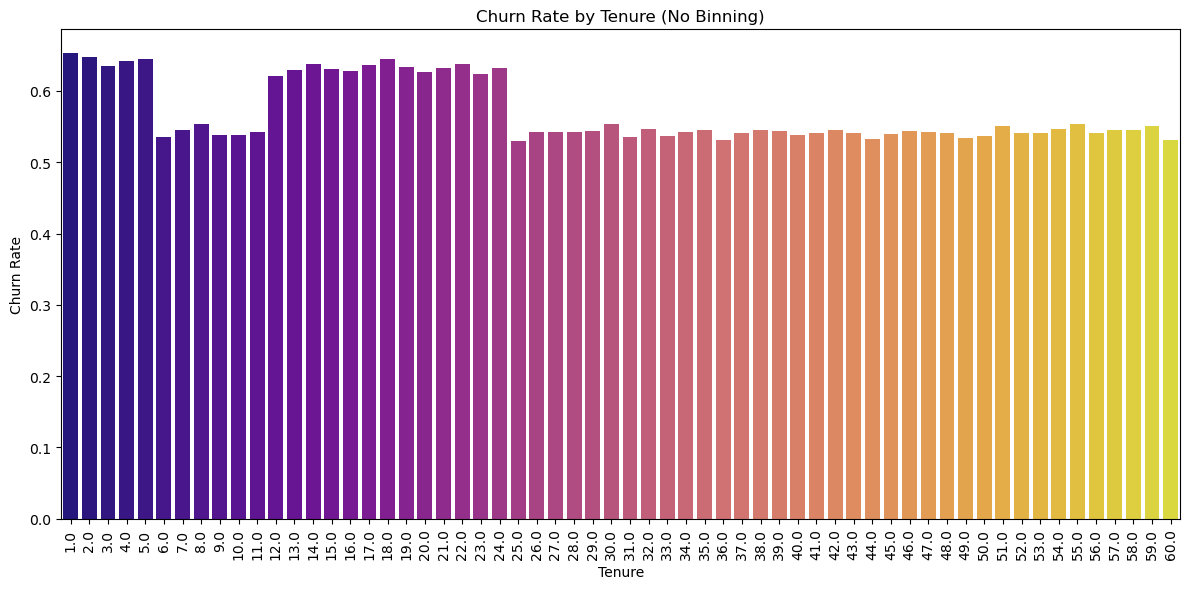

In [ ]:
# Calculate churn rate for each unique tenure value
tenure_churn_rate = df.groupby("Tenure")["Churn"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=tenure_churn_rate, x="Tenure", y="Churn", palette="plasma")

plt.title("Churn Rate by Tenure (No Binning)")
plt.xlabel("Tenure")
plt.ylabel("Churn Rate")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

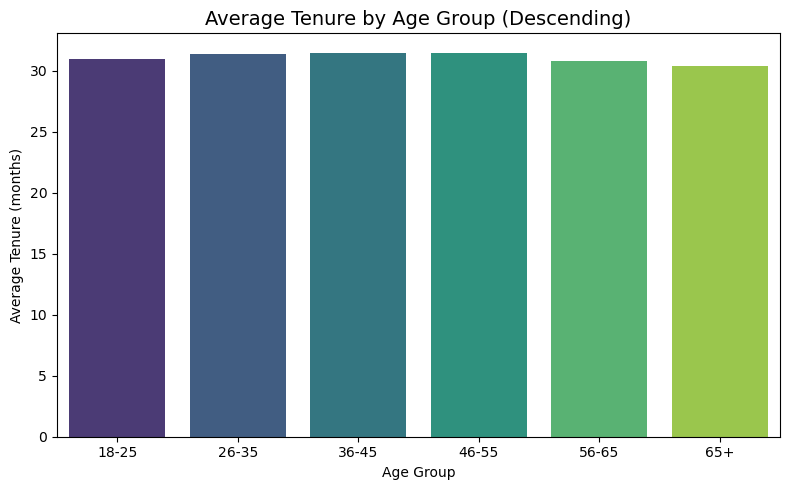

In [ ]:
tenure_by_age_group = df.groupby("Age Group")["Tenure"].mean().reset_index()
tenure_by_age_group.rename(columns={"Tenure": "Average Tenure"}, inplace=True)

# Sort in decreasing order of Average Tenure
tenure_by_age_group = tenure_by_age_group.sort_values(by="Average Tenure", ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=tenure_by_age_group, x="Age Group", y="Average Tenure", palette="viridis")

plt.title("Average Tenure by Age Group (Descending)", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Average Tenure (months)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Here We can see agin that middle age customers are more loyal, staying for longer period
#### Younger (18-25) and older (56-65) customers tend to leave earlier, as they have the lowest count of customers.
#### The data suggests that telecom companies may need to improve retention strategies for younger and older customers to increase long-term engagement.

### 4. Usage Frequency

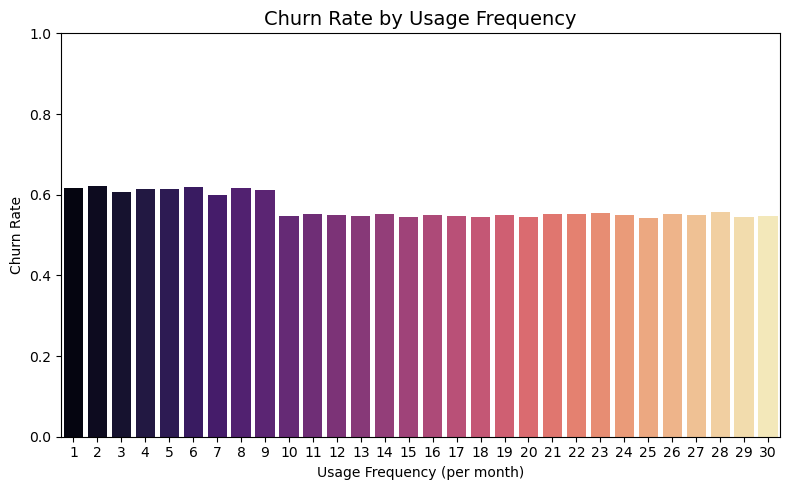

In [ ]:
# Fill missing values in 'Usage Frequency' with median or any logic you prefer
df["Usage Frequency"] = df["Usage Frequency"].fillna(df["Usage Frequency"].median())

# Convert to integer
df["Usage Frequency"] = df["Usage Frequency"].astype(int)

# Calculate churn rate by usage frequency
usage_churn = df.groupby("Usage Frequency")["Churn"].mean().reset_index()
usage_churn.rename(columns={"Churn": "Churn Rate"}, inplace=True)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=usage_churn, x="Usage Frequency", y="Churn Rate", palette="magma")

plt.title("Churn Rate by Usage Frequency", fontsize=14)
plt.xlabel("Usage Frequency (per month)")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


#### We can observe that churn rate begins to stabilize after 10 usage. 
#### Lower frequncy usage customers(0-9) have churn rate of around 60%
#### Higher freqency usage customers(10-30) have churn rate of around 55%
### This suggests us to :
#### Getting new users to cross the 10-usage threshold.
#### Why even high frequency users have high churn rate (55%).

### 5. Support Calls

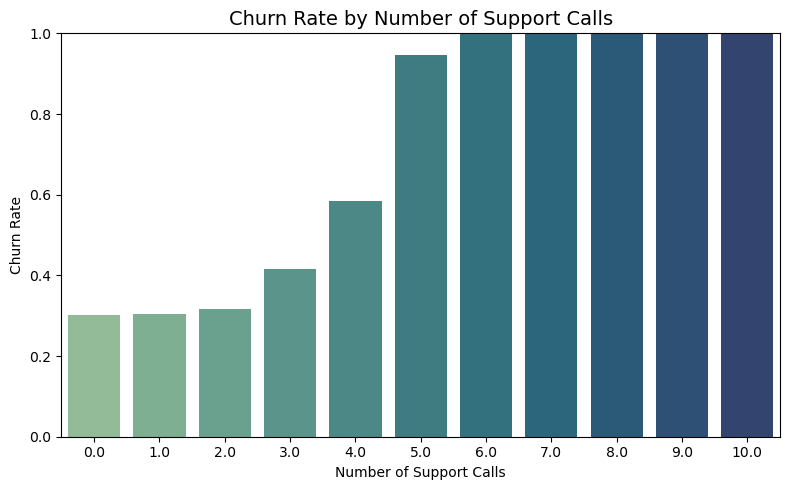

In [ ]:
# Fill missing values in 'Support Calls' if any
df["Support Calls"] = df["Support Calls"].fillna(df["Support Calls"].median())

# Group by Support Calls and calculate churn rate
support_churn = df.groupby("Support Calls")["Churn"].mean().reset_index()
support_churn.rename(columns={"Churn": "Churn Rate"}, inplace=True)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=support_churn, x="Support Calls", y="Churn Rate", palette="crest")

plt.title("Churn Rate by Number of Support Calls", fontsize=14)
plt.xlabel("Number of Support Calls")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


### Observations:
#### Customers who made 5 or more support calls have a very high churn rate (close to 100%).
#### This suggests that frequent callers may be experiencing unresolved issues, frustration, or dissatisfaction with customer service.
#### After 3+ calls customers churn due to frustration and dissatisfaction with multiple unsuccessful support calls.
### Actions :
#### Improve First-Call Resolution: Enhancing customer service efficiency could reduce frustration and retention risk.
#### Proactively Engage with Frequent Callers, Identifying customers with 3+ support calls and offer them personalized solutions, discounts, or priority service before they churn.

### 6. Payment Delay (No. of days payment of customer is overdue)

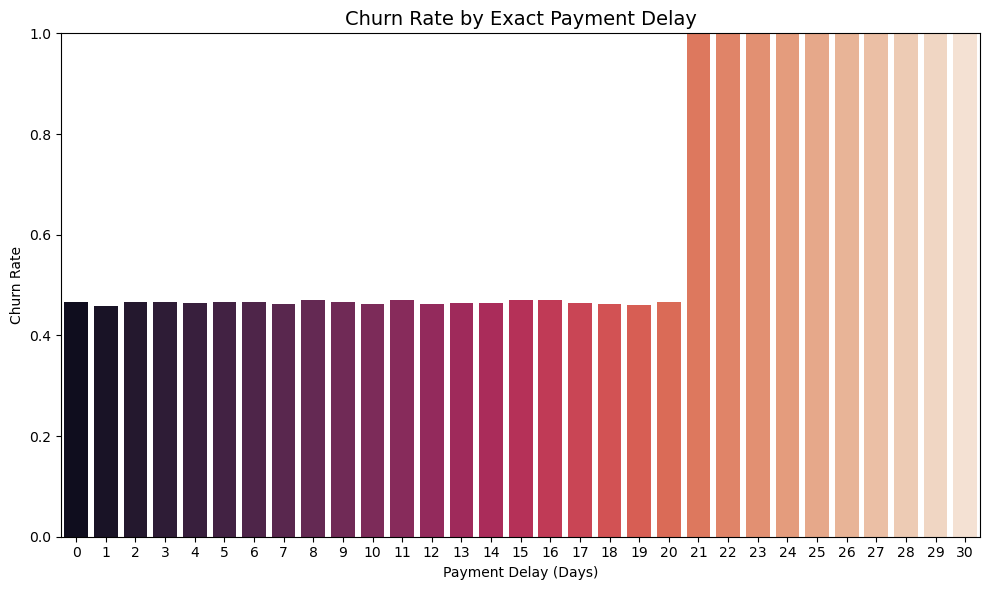

In [ ]:
# Ensure Payment Delay has no missing values
df["Payment Delay"] = df["Payment Delay"].fillna(df["Payment Delay"].median())
df["Payment Delay"] = df["Payment Delay"].astype(int)

# Calculate churn rate by each unique payment delay value
payment_delay_churn = df.groupby("Payment Delay")["Churn"].mean().reset_index()
payment_delay_churn.rename(columns={"Churn": "Churn Rate"}, inplace=True)

# Sort values for cleaner plot
payment_delay_churn.sort_values("Payment Delay", inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_delay_churn, x="Payment Delay", y="Churn Rate", palette="rocket")

plt.title("Churn Rate by Exact Payment Delay", fontsize=14)
plt.xlabel("Payment Delay (Days)")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


### insights :
#### Churn rate remainss constatly moderate for shorter delayss(~ 20 days).
#### This indicates that minor delays in payments don’t strongly impact churn.
#### Customers with payment delays of 21 days or more have a 100% churn rate.
#### This shows that customers who exceed a 21-day delay are almost guaranteed to churn.

### 7. Subscription Type 

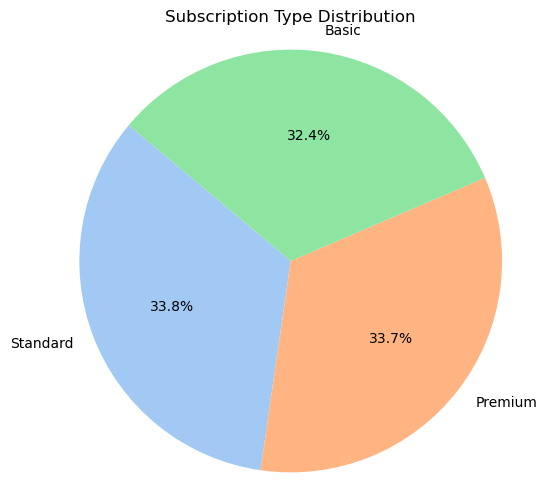

In [ ]:
# Subscription type distribution pie chart
subscription_counts = df["Subscription Type"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Subscription Type Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

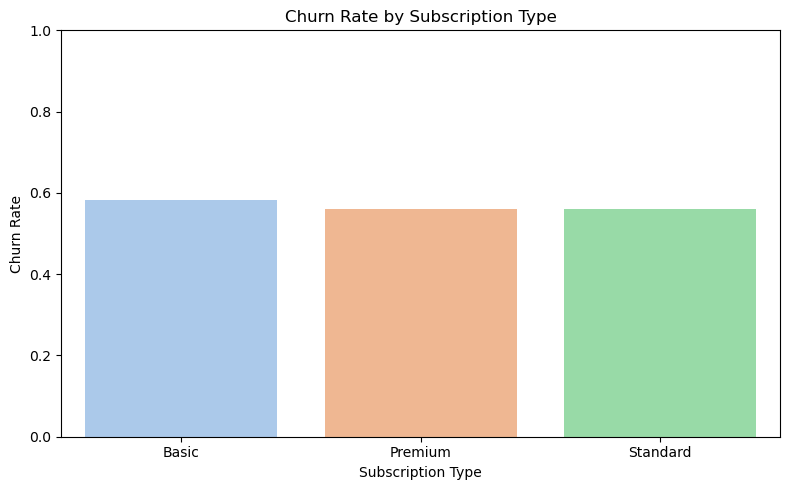

In [ ]:
# Churn rate by subscription type
subscription_churn = df.groupby("Subscription Type")["Churn"].mean().reset_index()
subscription_churn.rename(columns={"Churn": "Churn Rate"}, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(data=subscription_churn, x="Subscription Type", y="Churn Rate", palette="pastel")
plt.title("Churn Rate by Subscription Type")
plt.xlabel("Subscription Type")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


#### There is no significant difference among churnrate by subscription types, but basic plan has slightly higher churn rates

### 8. Customer's Contract Length

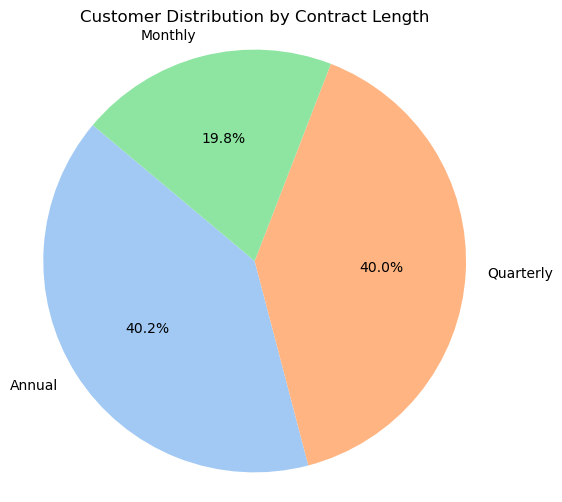

In [ ]:
# Contract Length distribution
contract_counts = df["Contract Length"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Customer Distribution by Contract Length")
plt.axis('equal')
plt.show()

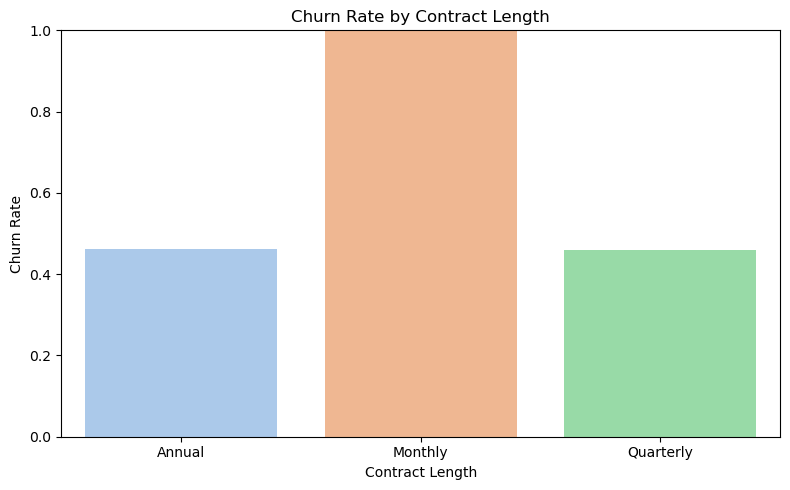

In [ ]:
# Churn rate by Contract Length
contract_churn = df.groupby("Contract Length")["Churn"].mean().reset_index()
contract_churn.rename(columns={"Churn": "Churn Rate"}, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(data=contract_churn, x="Contract Length", y="Churn Rate", palette="pastel")
plt.title("Churn Rate by Contract Length")
plt.xlabel("Contract Length")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### Observations :
#### Monthly contracts have highest churn rates (~100%)
#### As monthly contract are easier to cancel, that could be reason for high vhurn rate
#### Meanwhile Annual and Quarterly Subscription customers have lower churn rate(~45%), means they are more loyal.
### Actions :
#### Promoting Quarterly and Annual Subscription by attractive offers.

### 9. Total amount spent by customers during their tenure/Contract

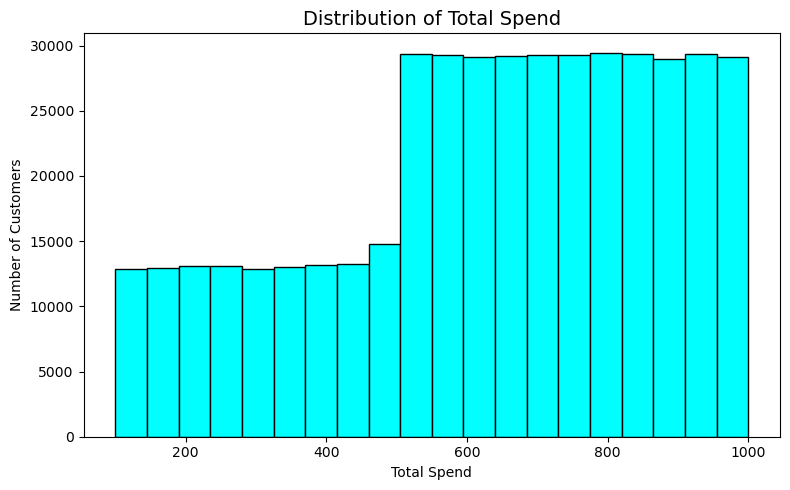

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df["Total Spend"], bins=20, color="cyan", edgecolor="black")

plt.title("Distribution of Total Spend", fontsize=14)
plt.xlabel("Total Spend")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

#### Here plot shows that there could be left skewness as the tail is longer on left side

## Feature Engineering (For Better Predictive Power)

### 1. Average of spend per month

In [ ]:
df["Spend per Month"] = df["Total Spend"] / (df["Tenure"] + 1)

### 2. Age Group

In [ ]:
if "Age Group" not in df.columns:
    df["Age Group"] = pd.cut(df["Age"], 
                             bins=[17, 25, 35, 45, 55, 65, 100], 
                             labels=["18-25", "26-35", "36-45", "46-55", "56-65", "66+"])

### 3. Average support call ratio

In [ ]:
df["Support Call Ratio"] = df["Support Calls"] / (df["Tenure"] + 1)

### Impute Missing Values

In [ ]:
# Add new features to the existing lists
numerical_cols.append("Spend per Month")
numerical_cols.append("Support Call Ratio")
categorical_cols.append("Age Group")

# Impute missing values for numerical columns (including new features)
imputer = SimpleImputer(strategy='median')

# Impute missing values in the numerical columns (including new features)
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

### Feature Scaling

In [ ]:
# Standardizing the numerical features (including new features)
scaler = StandardScaler()

# Apply standard scaling to numerical columns (including new features)
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### One-Hot Encoding

In [ ]:
# Encode the categorical columns (e.g., "Gender", "Subscription Type", "Contract Length", "Age Group")
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
df[categorical_cols] = df[categorical_cols].apply(label_encoder.fit_transform)

# Check if the changes have been applied correctly
print(df.head())

   CustomerID       Age  Gender    Tenure  Usage Frequency  Support Calls  \
0         2.0 -0.753327       0  0.448760        -0.210511       0.454550   
1         3.0  2.059648       0  1.028279        -1.724565       2.083103   
2         4.0  1.255941       0 -1.000038        -1.375168       0.780261   
3         5.0  1.497053       1  0.390808         0.604749       1.105971   
4         6.0 -1.315922       1  0.043097         0.488283       0.454550   

   Payment Delay  Subscription Type  Contract Length  Total Spend  \
0       0.609621                  2                0     1.247428   
1      -0.601319                  0                1    -0.309865   
2       0.609621                  0                2    -1.854700   
3      -0.722413                  2                1    -0.978463   
4      -0.601319                  0                1    -0.060698   

   Last Interaction  Churn  Age Group  Spend per Month  Support Call Ratio  
0          0.293052    1.0          2        

### Defining features and targets

In [ ]:
# Drop rows with missing target
df = df.dropna(subset=['Churn'])

# Split features and target
X = df[numerical_cols + categorical_cols]
y = df['Churn']

### Split the data into training and testing data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model fitting and prediction

In [ ]:
# Fit Random Forest
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

#### Evaluating model's performance

Accuracy: 0.9996
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



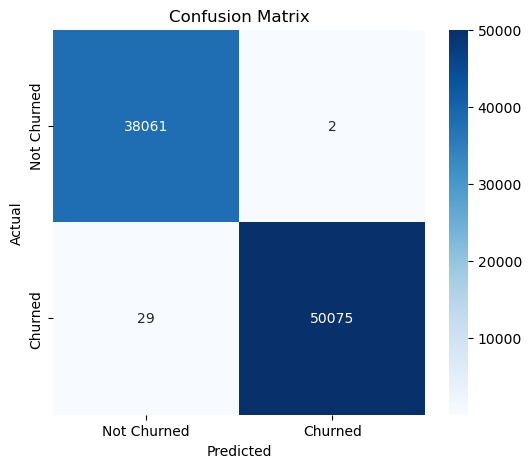

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Feature Importance 

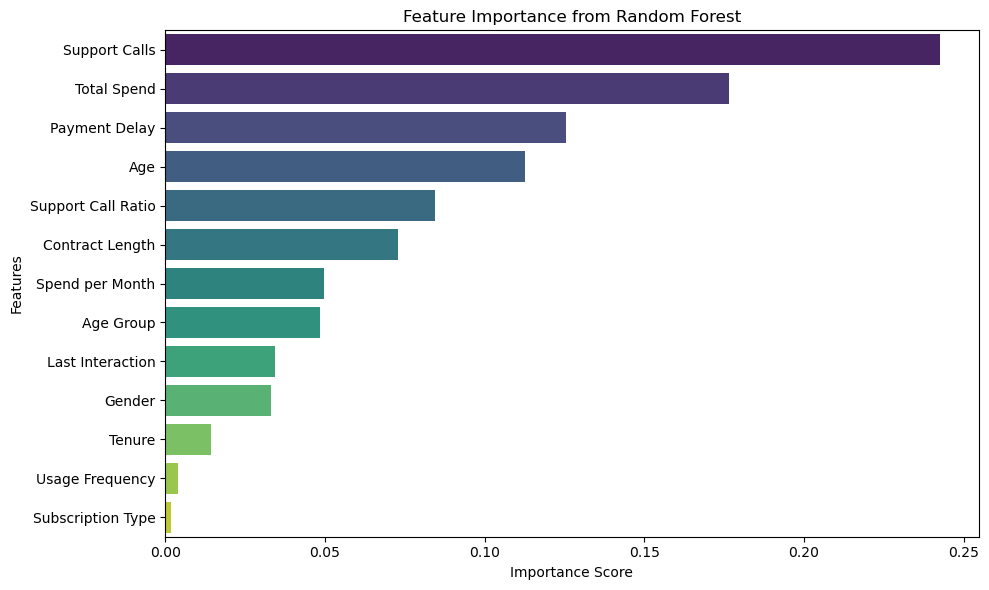

In [ ]:
# Feature Importance Plot
importances = classifier.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
